In [1]:
import os
from os import listdir
from os.path import join, dirname
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

PATH_REPO = dirname(os.getcwd())
PATH_DATA = join(PATH_REPO, 'data')

In [2]:
train = pd.read_csv(join(PATH_DATA, 'Train.csv'))
submission_df = pd.read_csv(join(PATH_DATA, 'SampleSubmission.csv'))
submission_df[['year', 'month', 'site_code', 'product_code']] = submission_df['ID'].str.split(' X ', expand=True)
product_data = pd.read_csv(join(PATH_DATA, 'product.csv'))
prodCode2prodType = {code:type for type, code in zip(product_data.loc[:,'product_type'].values, 
                                                product_data.loc[:,'product_code'].values)}


In [24]:
service_data = pd.read_csv(join(PATH_DATA, 'service_delivery_site_data.csv'))
servCode2servType = {code:type for code, type in zip(service_data.loc[:,'site_code'].values, 
                                                service_data.loc[:,'site_type'].values)}
train['service_type'] = train['site_code'].apply(lambda x: servCode2servType[x])

In [3]:
train['year_month'] = train['year'].astype(str) + '-' + train['month'].astype(str)
train['year_month'] = pd.to_datetime(train['year_month']).dt.strftime('%Y-%m')

### Amount of each product distributed

In [16]:
for product in np.unique(train.loc[:,'product_code']):
    data_product = train.loc[train.loc[:,'product_code']==product, 'stock_distributed'].sum()
    print(f'the total stock distributed for product code {product} and type {prodCode2prodType[product]} is {data_product}')

the total stock distribut for product code AS17005 and type Female Condom is 2104
the total stock distribut for product code AS21126 and type Injectable Contraceptive is 398
the total stock distribut for product code AS27000 and type Oral Contraceptive (Pill) is 158906
the total stock distribut for product code AS27132 and type Oral Contraceptive (Pill) is 23975
the total stock distribut for product code AS27133 and type Injectable Contraceptive is 146777
the total stock distribut for product code AS27134 and type Injectable Contraceptive is 97780
the total stock distribut for product code AS27137 and type Contraceptive Implant is 29787
the total stock distribut for product code AS27138 and type Contraceptive Implant is 26950
the total stock distribut for product code AS27139 and type Emergency Contraceptive (Pill) is 2234
the total stock distribut for product code AS42018 and type Intrauterine Device (IUD) is 560
the total stock distribut for product code AS46000 and type Male Condom 

- The products most consumed are the contraceptive pill and the injectable contraceptive. For the contraceptive pill there are 2 product codes and we see that one is 7x more consumed than the other.
- The injectable contraceptives are the most consumed. There are 3 types one is very rarely consumed. The two others are very consumed
- The female condom, emergency contraceptive and IUD are rarely consumed.

## Stock distributed per region

In [18]:
for region in np.unique(train.loc[:,'region']):
    sum = train.loc[train.loc[:,'region']==region, 'stock_distributed'].sum()
    print(f'the total stock distributed for region {region} is {sum}')

the total stock distributed for region ABIDJAN 1-GRANDS PONTS is 100827
the total stock distributed for region ABIDJAN 2 is 96064
the total stock distributed for region AGNEBY-TIASSA-ME is 30708
the total stock distributed for region BELIER is 21662
the total stock distributed for region BOUNKANI-GONTOUGO is 10105
the total stock distributed for region CAVALLY-GUEMON is 20448
the total stock distributed for region GBEKE is 7690
the total stock distributed for region GBOKLE-NAWA-SAN PEDRO is 32774
the total stock distributed for region GOH is 25898
the total stock distributed for region HAMBOL is 10772
the total stock distributed for region HAUT-SASSANDRA is 17842
the total stock distributed for region INDENIE-DJUABLIN is 6865
the total stock distributed for region KABADOUGOU-BAFING-FOLON is 6151
the total stock distributed for region LOH-DJIBOUA is 20033
the total stock distributed for region MARAHOUE is 19589
the total stock distributed for region N'ZI-IFOU-MORONOU is 19239
the total 

## Stock distributed by type of service

In [31]:
for service in np.unique(train.loc[:,'service_type']):
    sum = train.loc[train.loc[:,'service_type']==service, 'stock_distributed'].sum()
    print(f'the total stock distributed for service {service} is {sum}')
    print(f'In total there are {train.loc[train.loc[:,"service_type"]==service,].shape[0]} {service}')
    print(f'ratio is {sum/train.loc[train.loc[:,"service_type"]==service,].shape[0]} per {service}')
    print('\n')



the total stock distributed for service Health Center is 149593
In total there are 10332 Health Center
ratio is 14.478610143244289 per Health Center


the total stock distributed for service Hospital is 367502
In total there are 24779 Hospital
ratio is 14.831187699261472 per Hospital


the total stock distributed for service University Hospital/National Institute is 10774
In total there are 642 University Hospital/National Institute
ratio is 16.781931464174455 per University Hospital/National Institute




In 3 years the distribution in average is of 15 contraceptives per service site!!

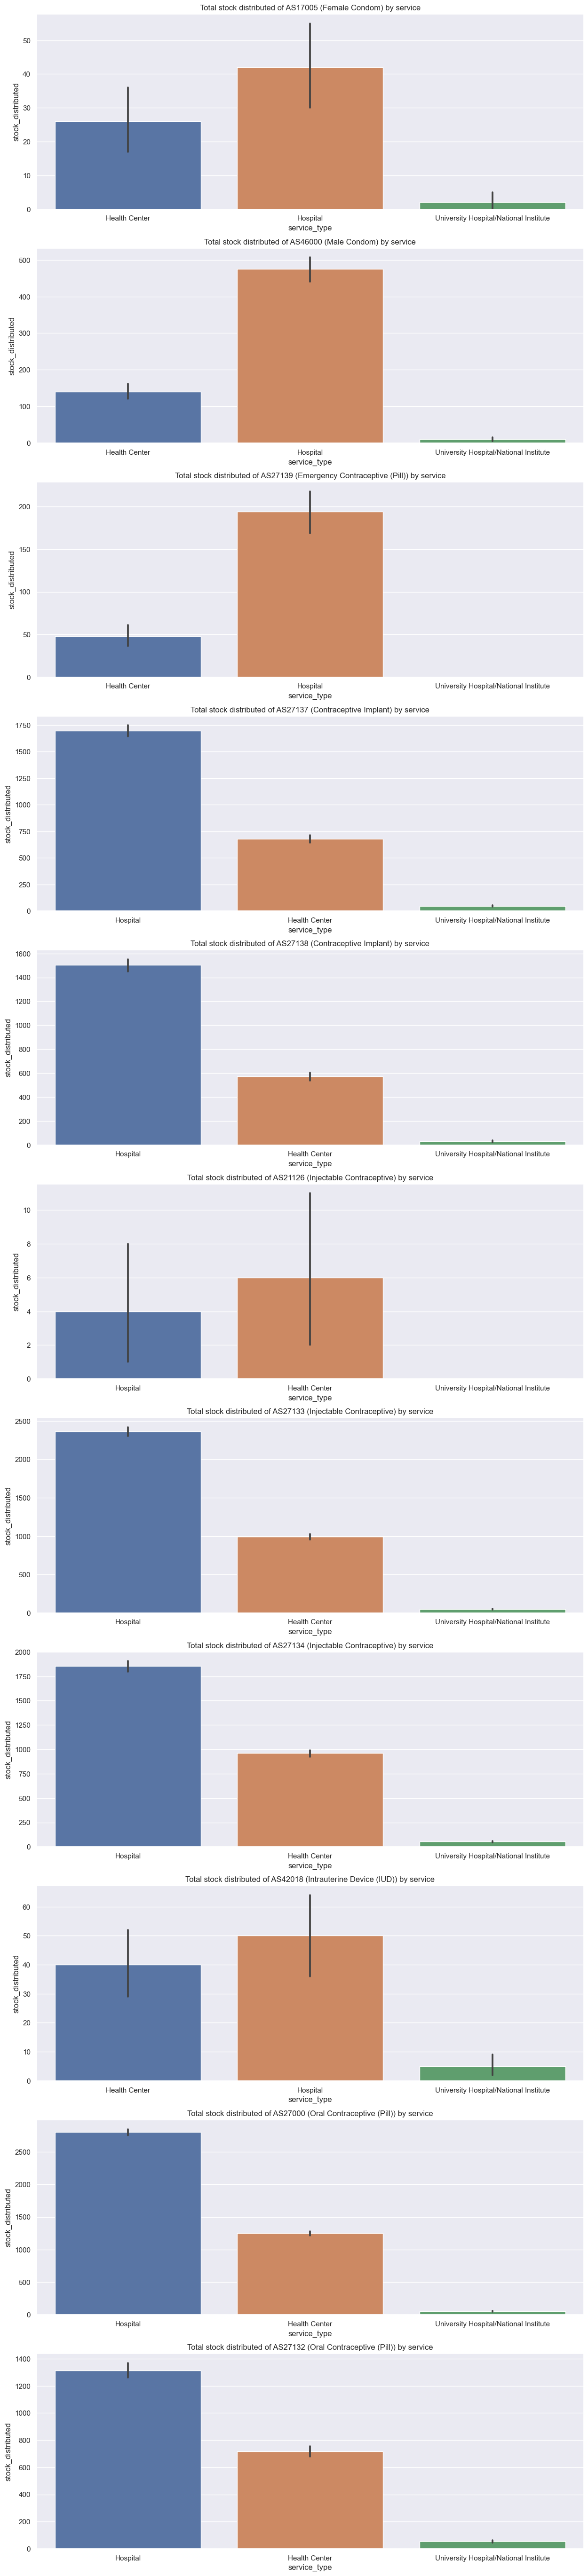

In [84]:
from numpy import count_nonzero

fig, ax = plt.subplots(nrows=len(prodCode2prodType), ncols=1, figsize=(15, 70))

for k, (prod_code, prod_type) in enumerate(prodCode2prodType.items()):
    data_product = train.loc[train.loc[:,'product_code']==prod_code,]
    sns.barplot(x = 'service_type', y='stock_distributed',  data = data_product, estimator=count_nonzero,ax=ax[k])
    ax[k].set_title(f'Total stock distributed of {prod_code} ({prod_type}) by service')
#plt.show()

## Plot variable for product

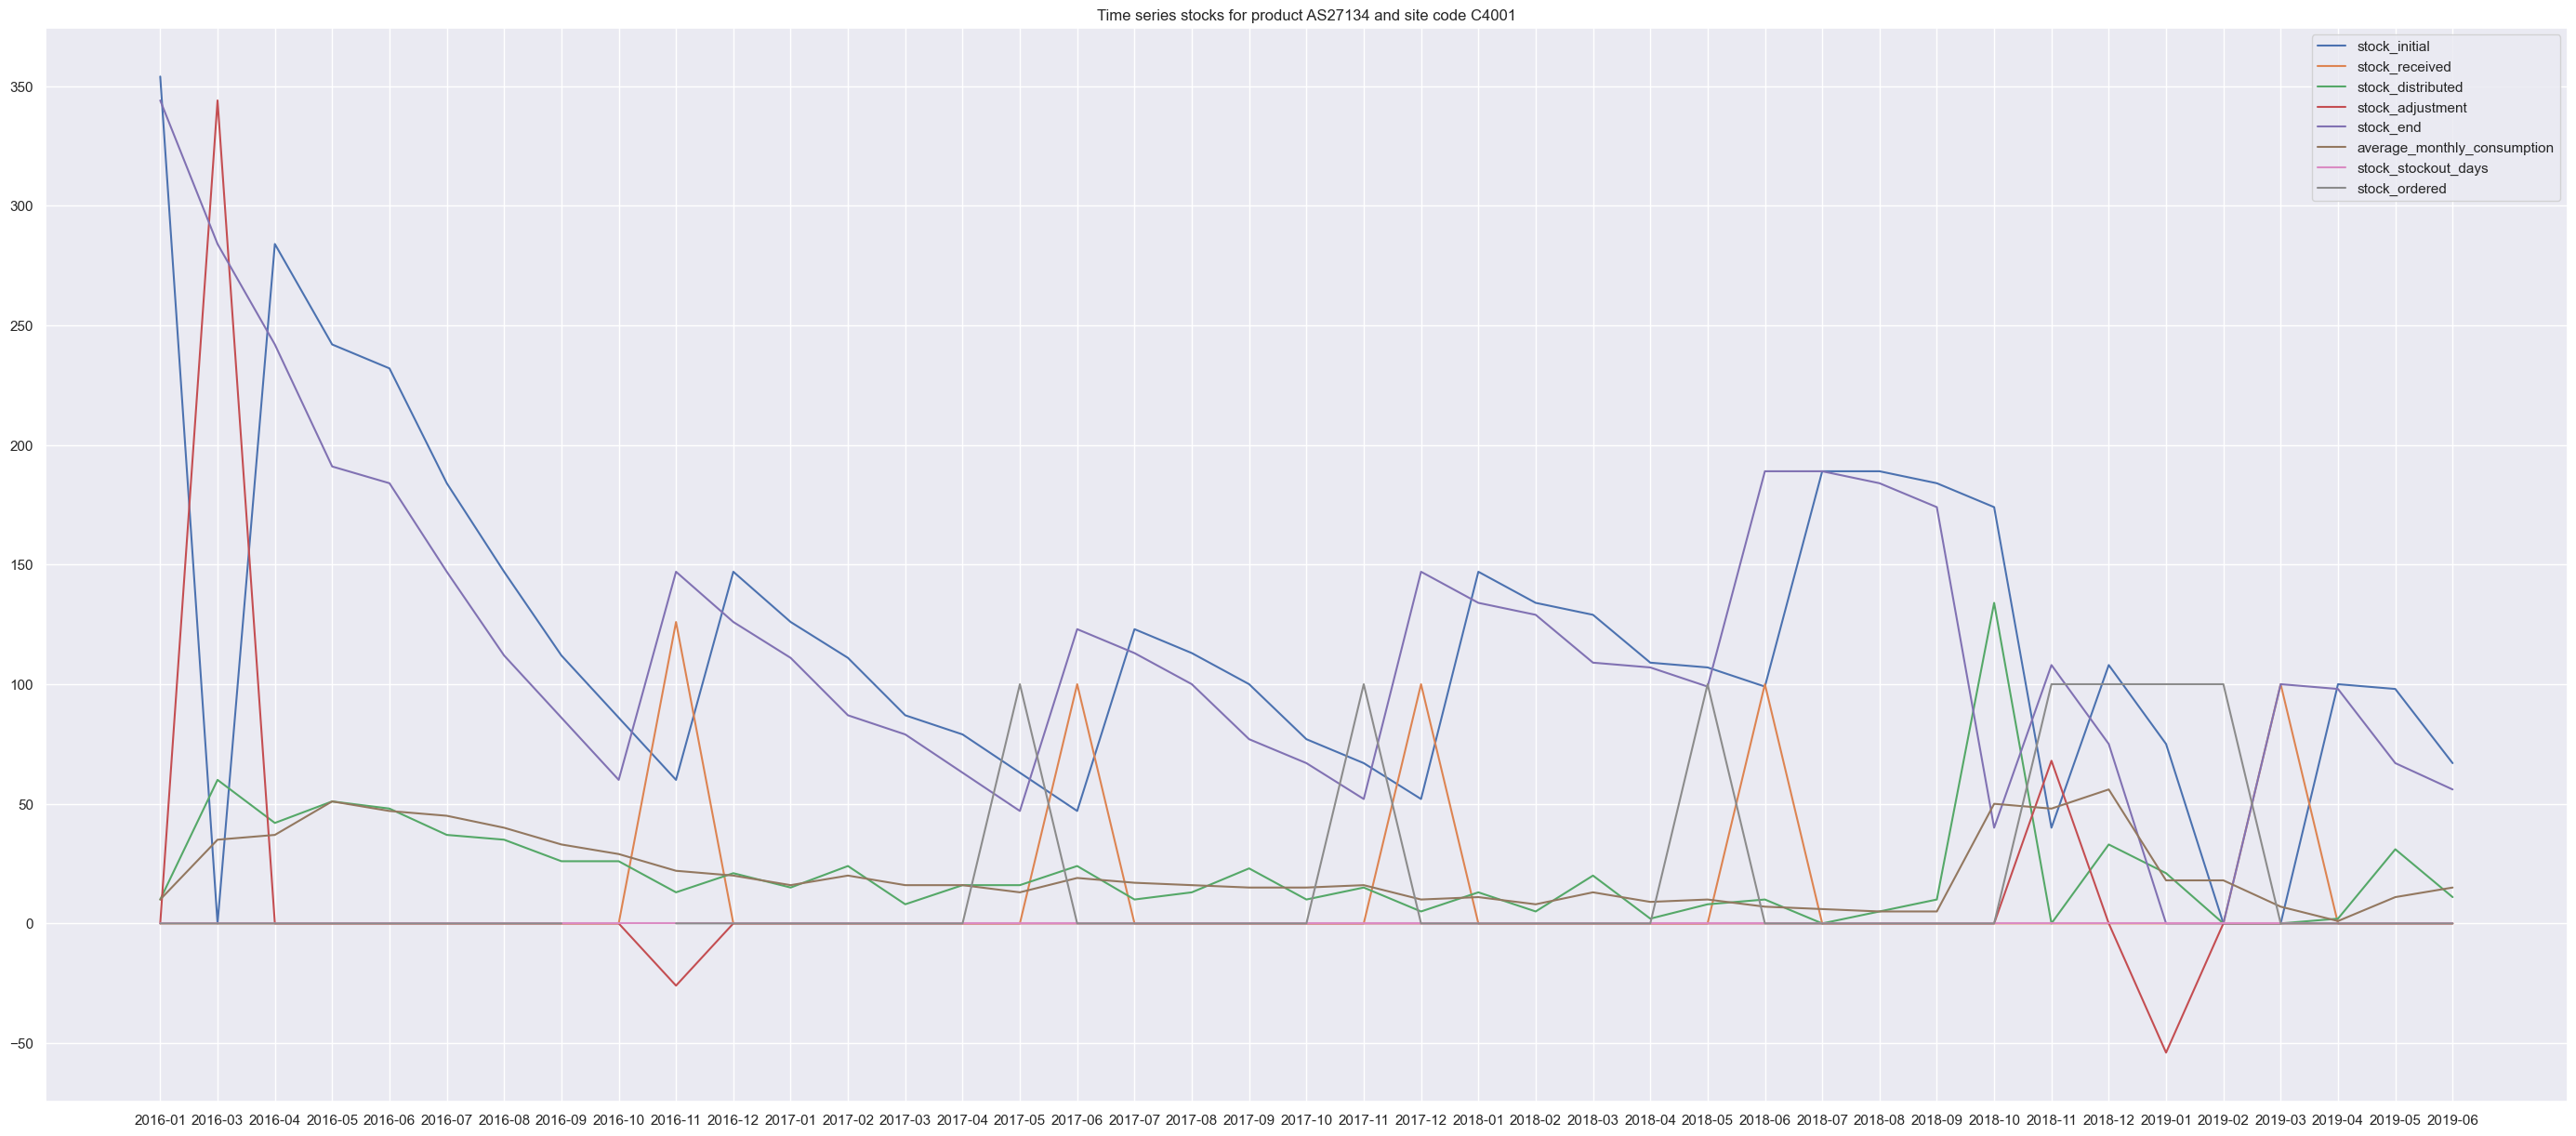

In [38]:
sns.set()
plt.rcParams["figure.figsize"] = (35,15)

data_product_site = train.loc[(train.loc[:,'site_code']=='C4001') & (train.loc[:,'product_code']=='AS27134') ,]
data_product_site.index = data_product_site['year_month']
sorted_idx = data_product_site.index.sort_values()
data_product_site = data_product_site.loc[sorted_idx,]

for col in data_product_site.columns[6:-2]:
    plt.plot(data_product_site.index, data_product_site[col], label=col)
plt.title('Time series stocks for product AS27134 and site code C4001')
plt.legend()


## Let's study for all the products on a service site

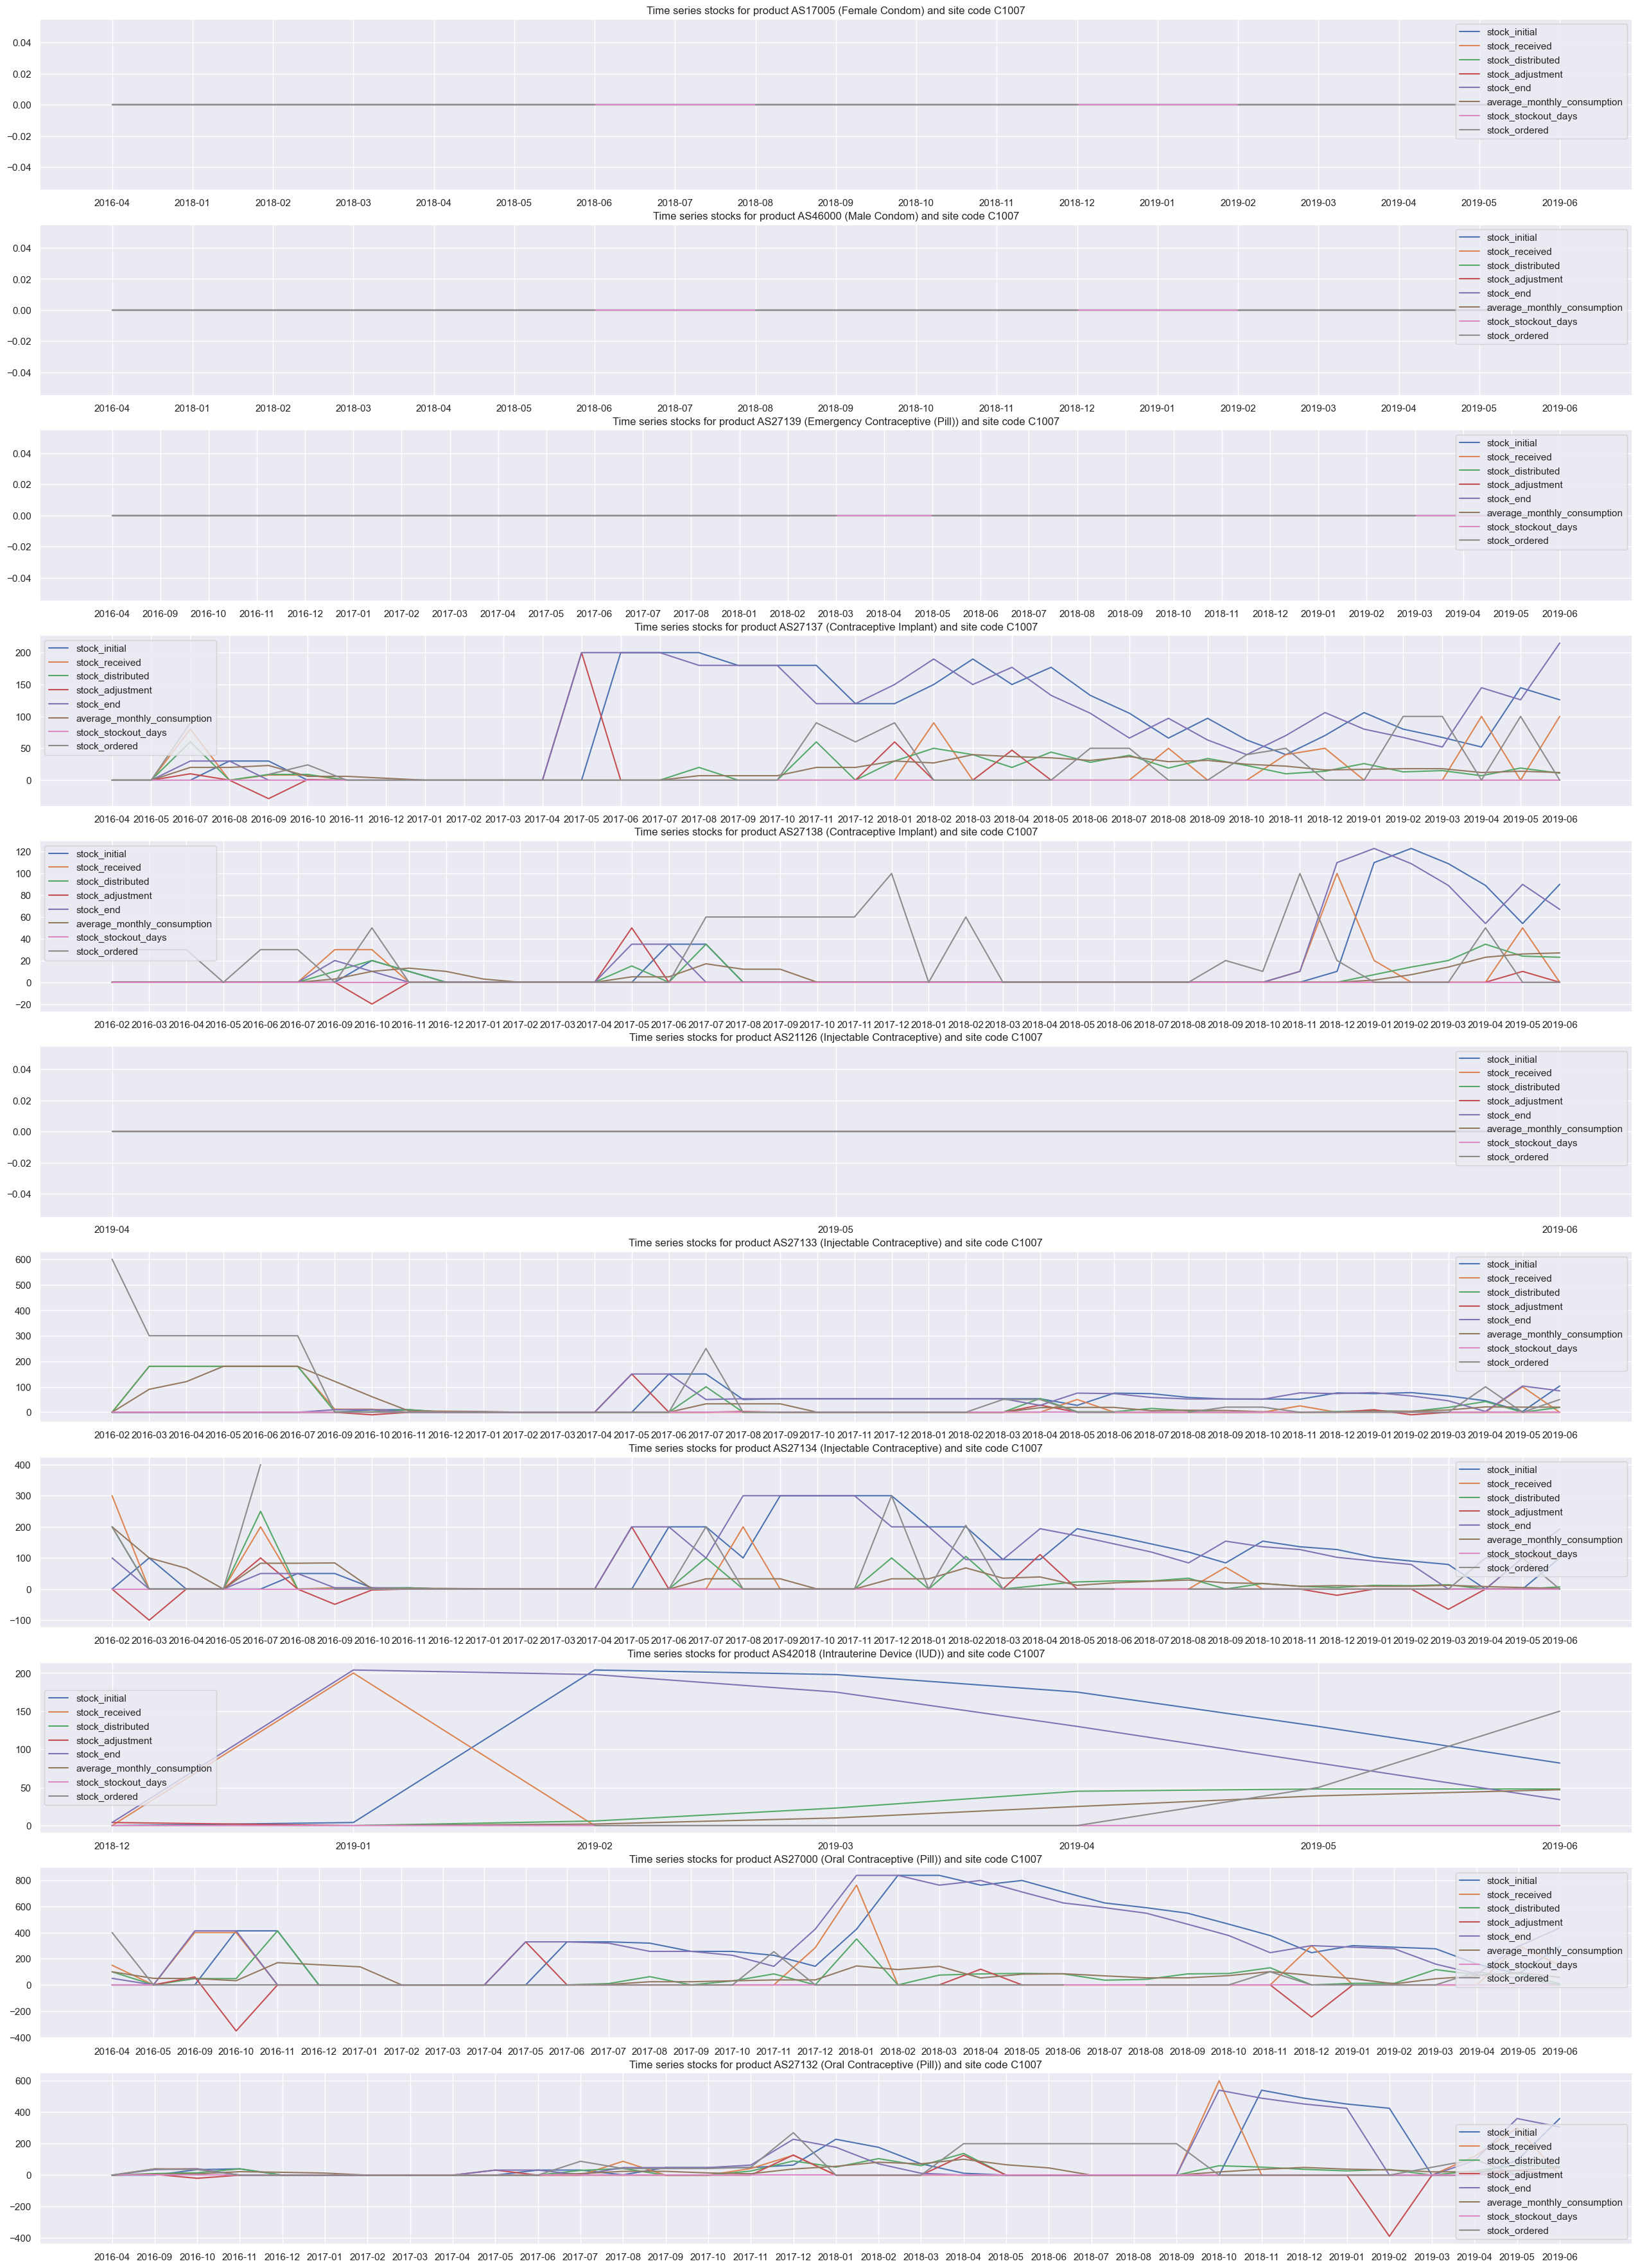

In [62]:
SERVICE_SITE = 'C1007'

fig, ax = plt.subplots(nrows=len(prodCode2prodType), ncols=1, figsize=(32, 45))

for k,prod_code in enumerate(prodCode2prodType.keys()):
    data_product_site = train.loc[(train.loc[:,'site_code']==SERVICE_SITE) & (train.loc[:,'product_code']==prod_code) ,]
    data_product_site.index = data_product_site['year_month']
    sorted_idx = data_product_site.index.sort_values()
    data_product_site = data_product_site.loc[sorted_idx,]

    for col in data_product_site.columns[6:-2]:
        ax[k].plot(data_product_site.index, data_product_site[col], label=col)
    ax[k].set_title(f'Time series stocks for product {prod_code} ({prodCode2prodType[prod_code]}) and site code {SERVICE_SITE}')
    ax[k].legend()


### Study products with rare consumptions


{'AS17005': 'Female Condom',
 'AS46000': 'Male Condom',
 'AS27139': 'Emergency Contraceptive (Pill)',
 'AS27137': 'Contraceptive Implant',
 'AS27138': 'Contraceptive Implant',
 'AS21126': 'Injectable Contraceptive',
 'AS27133': 'Injectable Contraceptive',
 'AS27134': 'Injectable Contraceptive',
 'AS42018': 'Intrauterine Device (IUD)',
 'AS27000': 'Oral Contraceptive (Pill)',
 'AS27132': 'Oral Contraceptive (Pill)'}

In [66]:
products_rare_consumed = {'AS17005': 'Female Condom', 'AS27139': 'Emergency Contraceptive (Pill)', 
                            'AS42018': 'Intrauterine Device (IUD)', 'AS21126': 'Injectable Contraceptive'}

for prod_code, prod_type in products_rare_consumed.items():
    data_product = train.loc[(train.loc[:,'product_code']=='AS17005') &  (train.loc[:,'stock_distributed']>0),]
    codes_product = np.unique(data_product.loc[:,'site_code'])
    


In [67]:
data_product

,year,month,region,district,site_code,product_code,stock_initial,stock_received,stock_distributed,stock_adjustment,stock_end,average_monthly_consumption,stock_stockout_days,stock_ordered,year_month,service_type
527,2019,3,ABIDJAN 1-GRANDS PONTS,ADJAME-PLATEAU-ATTECOUBE,C1014,AS17005,50,0,1,0,49,0,0,0.0,2019-03,Health Center
1386,2019,4,N'ZI-IFOU-MORONOU,BONGOUANOU,C4017,AS17005,0,9,3,0,6,2,0,0.0,2019-04,Hospital
1402,2019,5,N'ZI-IFOU-MORONOU,BONGOUANOU,C4017,AS17005,6,0,3,0,3,2,0,0.0,2019-05,Hospital
1874,2019,3,ABIDJAN 2,COCODY-BINGERVILLE,C1018,AS17005,5,0,1,0,4,0,0,0.0,2019-03,Health Center
4882,2019,4,BOUNKANI-GONTOUGO,TANDA,C2168,AS17005,2,0,2,0,0,1,0,3.0,2019-04,Hospital
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33676,2016,10,AGNEBY-TIASSA-ME,SIKENSI,C1098,AS17005,14,0,2,0,12,1,0,0.0,2016-10,Hospital
34138,2016,12,BOUNKANI-GONTOUGO,TANDA,C4026,AS17005,95,0,2,0,93,1,0,0.0,2016-12,Hospital
34245,2016,3,AGNEBY-TIASSA-ME,TIASSALE,C2065,AS17005,0,50,1,0,49,0,0,0.0,2016-03,Hospital
35004,2016,12,BELIER,YAMOUSSOUKRO,C2009,AS17005,0,100,3,0,97,1,0,0.0,2016-12,Hospital
